# Example Usage of the Package

In [30]:
import typing
from rvispoly import Point, Polygon, PolygonWithHoles, VisibilityPolygonCalculator
import matplotlib.pyplot as plt

In [31]:
# construct a polygon
# outer_boundary should be in CCW order, holes CW
outer_boundary = [
    Point(0, 0), Point(28, 0), Point(28, 6), Point(24, 6), Point(24, 10), Point(28, 10),
    Point(28, 24), Point(0, 24), Point(0, 16), Point(4, 16), Point(4, 12), Point(0, 12)
]

holes = [
    [Point(6, 4), Point(6, 8), Point(10, 8), Point(10, 4)],
    [Point(12, 4), Point(12, 10), Point(16, 10), Point(16, 8), Point(14, 8), Point(14, 4)],
    [Point(4, 18), Point(4, 21), Point(7, 21), Point(7, 18)],
    [Point(20, 14), Point(20, 22), Point(23, 22), Point(23, 14)],
    [Point(10, 15), Point(10, 17), Point(18, 17), Point(18, 15)]
]

In [32]:
# simple plotting function
def plot_polygon(
    polygon: typing.Union[Polygon, PolygonWithHoles], color="blue", ax=None, **kwargs
):
    if ax is None:
        ax = plt.gca()
    if type(polygon) == PolygonWithHoles:
        plot_polygon(polygon.outer_boundary(), color=color, ax=ax, **kwargs)
        for hole in polygon.holes():
            plot_polygon(hole, color="white")
    else:
        x = [float(p.x()) for p in polygon.boundary()]
        y = [float(p.y()) for p in polygon.boundary()]
        ax.fill(x, y, color=color, **kwargs)

In [33]:
polygon = PolygonWithHoles(outer_boundary, holes)
visp_poly_calc = VisibilityPolygonCalculator(polygon)
vis_poly = visp_poly_calc.compute_visibility_polygon(Point(0, 0))

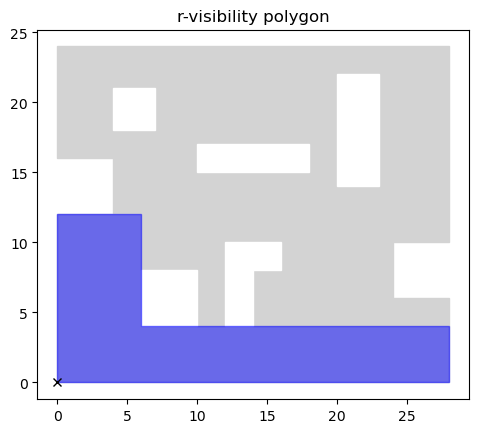

In [35]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.title("r-visibility polygon")
plot_polygon(polygon, ax=ax, color="lightgrey")
plot_polygon(vis_poly, ax=ax, color="blue", alpha=0.5)
plt.plot([0.0], [0.0], "x", color="black")